# Part 3

### The code used for obtainig various results in the Part 3 are given in this Jupyter Notebook.

In [46]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import sklearn as skl
import pandas as pd

## The data from the computer is read into the pandas dataframe df

In [47]:
df = pd.read_csv('C:/Users/Venkata Saketh Ch/Desktop/Healthcare/Case Study 2/Heart.csv')

# Data Pre-processing

In [48]:
# Replacing the missing values with NaN and dropping the corresponding rows containing the missing values
df.replace('?', np.nan, inplace=True)
df.dropna(axis=0, inplace=True)
df.reset_index(drop = True, inplace = True)

In [49]:
# Converting the datatypes of various columns to the required types
df['Ca'] = pd.to_numeric(df['Ca'], errors='coerce')
df['Thal'] = pd.to_numeric(df['Thal'], errors='coerce')
df[['Age', 'Sex', 'Fbs', 'Exang', 'Ca']] = df[['Age', 'Sex', 'Fbs', 'Exang', 'Ca']].astype(int)
df[['Trestbps', 'Chol', 'Thalach', 'Oldpeak']] = df[['Trestbps', 'Chol', 'Thalach', 'Oldpeak']].astype(float)

In [50]:
# Converting the response variable Num to have only two categories 0 and 1-4
df['Num'].replace(to_replace=[1, 2, 3, 4], value=1, inplace=True)

# Initial Data Analysis

## Categorical Data

In [51]:
# We define the Category_plot function which plots the required graphs of the categorical data attribute
def Category_plot(col_name, label, ax_index):
    sns.countplot(x= col_name, data=df, ax=axes[ax_index][0])
    sns.countplot(x='Num', hue=col_name, data=df, ax=axes[ax_index][1])
    avg = df[[col_name, 'Num']].groupby([col_name], as_index=False).mean()
    sns.barplot(x=col_name, y='Num', hue=col_name, data=avg, ax=axes[ax_index][2])
    
    for t, l in zip(axes[ax_index][1].get_legend().texts, label):
        t.set_text(l)
    for t, l in zip(axes[ax_index][2].get_legend().texts, label):
        t.set_text(l)

[None, None, None, None, None, None, None]

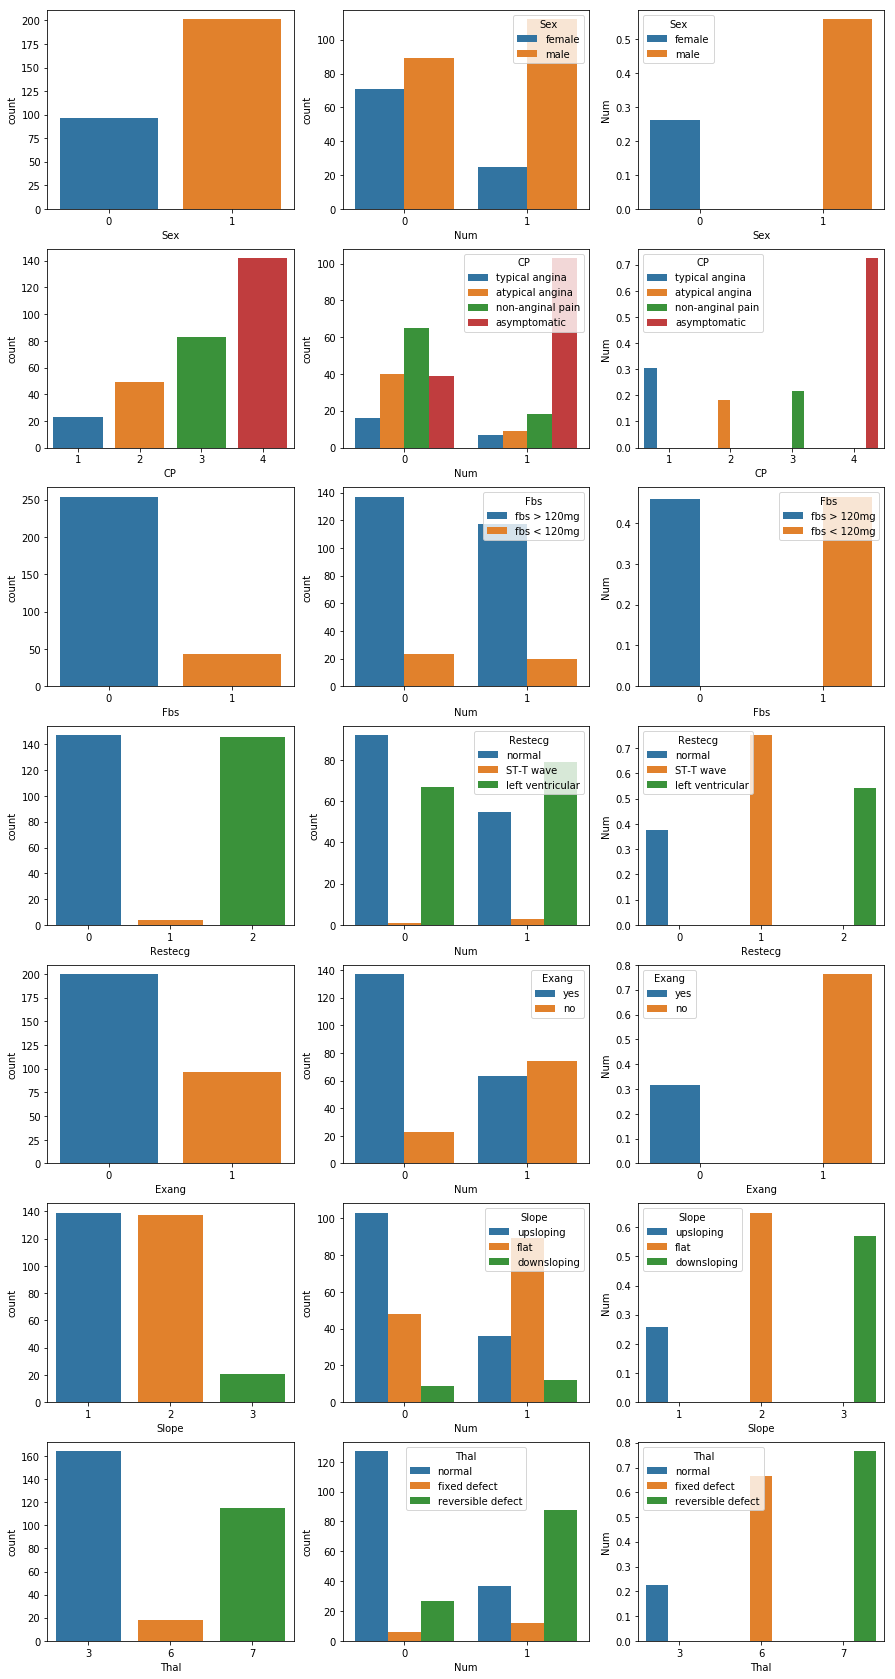

In [52]:
categorial = [('Sex', ['female', 'male']), 
              ('CP', ['typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic']), 
              ('Fbs', ['fbs > 120mg', 'fbs < 120mg']), 
              ('Restecg', ['normal', 'ST-T wave', 'left ventricular']), 
              ('Exang', ['yes', 'no']), 
              ('Slope', ['upsloping', 'flat', 'downsloping']), 
              ('Thal', ['normal', 'fixed defect', 'reversible defect'])]

fig_categorial, axes = plt.subplots(nrows=len(categorial), ncols=3, figsize=(15, 30))
[Category_plot(x[0], x[1], i) for i, x in enumerate(categorial)]

## Observations from the analysis of categorical data

* Men have the higher number of heart disease patients compared to women. Therefore the attribute "Sex" has an impact on the response variable "Num".
* People with asymptotic chest pain type seem to be getting the highest number of heart diseases.
* The attribute "Fbs" (Fasting blood sugar) cannot be used to differentiate the people having heart diseases or not.
* "Restecg" is a great differentiating variable for predicting the people with heart disease.
* "Exang" (Exercise induced angina) is a good differentiating variable for predicting the people with heart disease.
* People with flat or Upsloping peak "Slope" exercise rate are more susceptible to heart disease.
* "Thal" can be a great differentiating variable for predicting the people with heart disease.

## Continuous Data

In [53]:
# We define the Continuous_plot function which plots the required graphs of the continuous data attribute
def Continuous_plot(col_name, xlabel, ax_index):
    sns.distplot(df[[col_name]], ax=axes[ax_index][0])
    axes[ax_index][0].set(xlabel=xlabel, ylabel='density')
    sns.violinplot(x='Num', y=col_name, data=df, ax=axes[ax_index][1])

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:

[None, None, None, None, None]

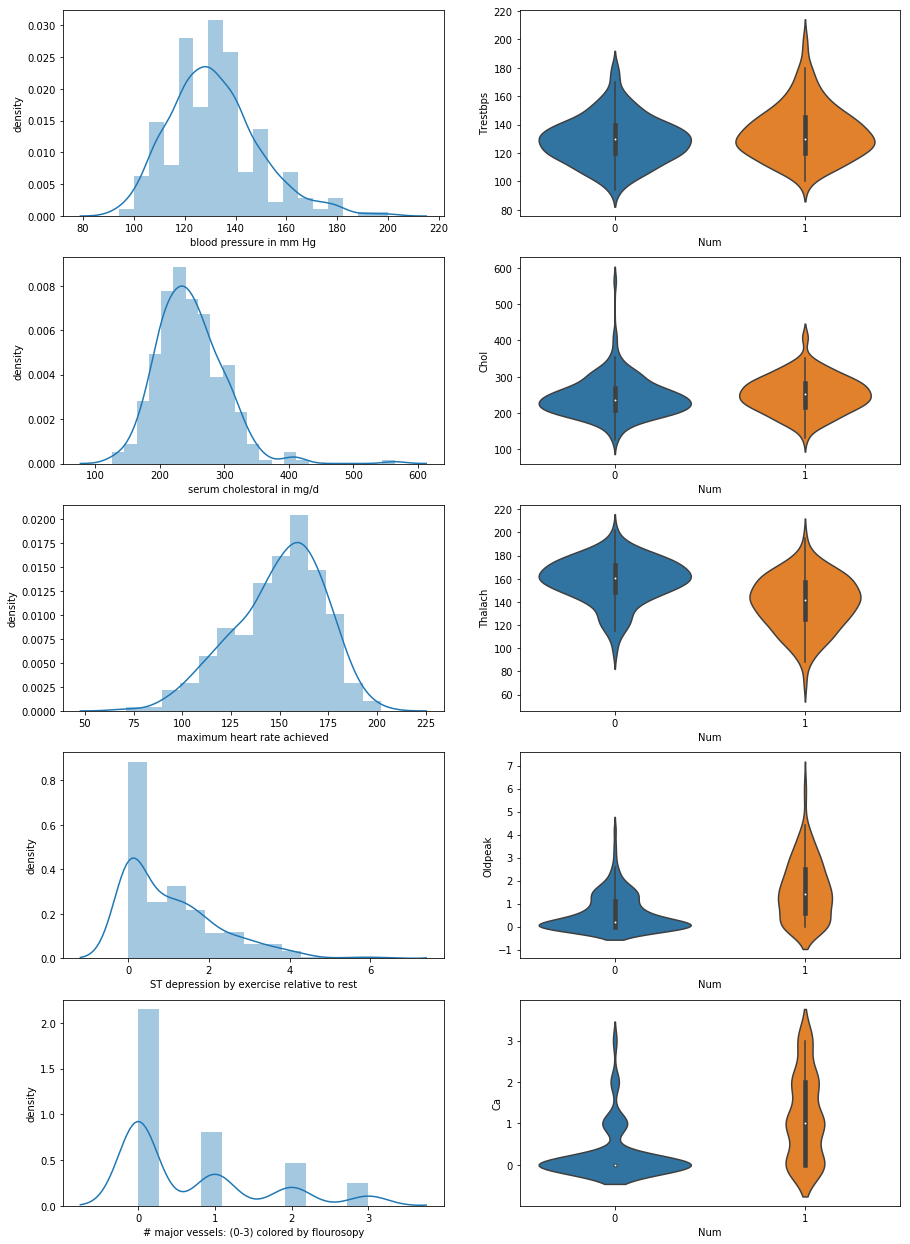

In [54]:
continuous = [('Trestbps', 'blood pressure in mm Hg'), 
              ('Chol', 'serum cholestoral in mg/d'), 
              ('Thalach', 'maximum heart rate achieved'), 
              ('Oldpeak', 'ST depression by exercise relative to rest'), 
              ('Ca', '# major vessels: (0-3) colored by flourosopy')]
fig_continuous, axes = plt.subplots(nrows=len(continuous), ncols=2, figsize=(15, 22))
[Continuous_plot(x[0], x[1], i) for i, x in enumerate(continuous)]

## Observations from the analysis of Continuous Data

* Blood Pressure ("Trestbps"), Serum Cholesterol ("Chol") and Maximum Heart Rate Achieved ("Thalach") seem to be uniformly distributed around the Mean. Hence their impact on Response variable "Num" is less.
* "Oldpeak" and "Ca" have maximum impact on response variable "Num".

## Dummifying the categorical variables Cp, Restecg, Slope, Thal 

In [55]:
cp_dummy = pd.get_dummies(df['CP'])
cp_dummy.rename(columns={1: 'cp_typical_angina', 2: 'cp_atypical_angina',
                         3: 'cp_non_angina', 4: 'cp_asymptomatic_angina'},
                inplace=True)
restecg_dummy = pd.get_dummies(df['Restecg'])
restecg_dummy.rename(columns={0: 'restecg_normal', 1: 'restecg_wave_abnorm',
                              2: 'restecg_ventricular_ht'}, inplace=True)
slope_dummy = pd.get_dummies(df['Slope'])
slope_dummy.rename(columns={1: 'slope_upsloping', 2: 'slope_flat',
                            3: 'slope_downsloping'}, inplace=True)
thal_dummy = pd.get_dummies(df['Thal'])
thal_dummy.rename(columns={3: 'thal_normal', 6: 'thal_fixed_defect',
                           7: 'thal_reversible_defect'}, inplace=True)
df = pd.concat([df, cp_dummy, restecg_dummy, slope_dummy, thal_dummy], axis=1)
df.drop(['CP', 'Restecg', 'Slope', 'Thal'], axis=1, inplace=True)

## Creating the dependent and independent variable set

In [56]:
df_X = df.drop('Num', axis=1)
df_y = df['Num']

## Normalizing the continuous variables

In [57]:
# Creating the normalize function
def normalize(df, toNormalize): 
    result = df.copy()
    for item in df.columns:
        if (item in toNormalize):
            max_value = df[item].max()
            min_value = df[item].min()
            result[item] = (df[item] - min_value) / (max_value - min_value)
    return result

In [58]:
toNormalize = ['Age', 'Trestbps', 'Chol', 'Thalach', 'Oldpeak', 'Ca'] #columns to normalize
df_norm = normalize(df, toNormalize)
df_norm = df_norm.dropna()

## Creating the Training & Test set

In [59]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_norm, test_size = 0.25, random_state = 10)
X_train = train.ix[:, train.columns != 'Num']
Y_train = train.ix[:, train.columns == 'Num']
X_test = test.ix[:, test.columns != 'Num']
Y_test = test.ix[:, test.columns == 'Num']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-depreca

## Implementing the Decision Tree Classifier

In [60]:
# Importing the necessary modules
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import tree 
from sklearn.metrics import roc_curve 
from sklearn.metrics import auc 

# Implementing the decision tree classifier 
dt = tree.DecisionTreeClassifier(random_state = 15)
dt = dt.fit(X_train, Y_train)
predictions_dt = dt.predict(X_test)

## Evaluating the Performance of Decision Tree Classifier

In [88]:
from sklearn.metrics import confusion_matrix
cm_dt = confusion_matrix(Y_test, predictions_dt, labels = [1,0])
print('Confusion Matrix : \n', cm_dt)
TP = cm_dt[0,0]
FN = cm_dt[0,1]
FP = cm_dt[1,0]
TN = cm_dt[1,1]
accuracy_dt=(TP + TN) / float(TP + TN + FP + FN)
print ('Accuracy : ', accuracy_dt)
sensitivity_dt = TP / float(FN + TP)
print('Sensitivity : ', sensitivity_dt )
specificity_dt = TN / float(TN + FP)
print('Specificity : ', specificity_dt)
ppv_dt = TP / float(FP + TP)
print('Positive Predictive Value: ', ppv_dt)
npv_dt = TN / float(TN + FN)
print('Negative Predictive Value: ', npv_dt)
false_positive_rate = FP / float(TN + FP)
print('False Positive Rate: ',false_positive_rate)
precision = TP / float(TP + FP)
print('Precision: ', precision)

Confusion Matrix : 
 [[23  5]
 [11 36]]
Accuracy :  0.7866666666666666
Sensitivity :  0.8214285714285714
Specificity :  0.7659574468085106
Positive Predictive Value:  0.6764705882352942
Negative Predictive Value:  0.8780487804878049
False Positive Rate:  0.23404255319148937
Precision:  0.6764705882352942


## Developing a ROC Curve for Decision Tree Classifier and computing the AUC

In [86]:
#ROC curve calculation 
fpr1, tpr1, _ = roc_curve(predictions_dt, Y_test)

#AUC curve calcuation
auc_dt = auc(fpr1, tpr1)

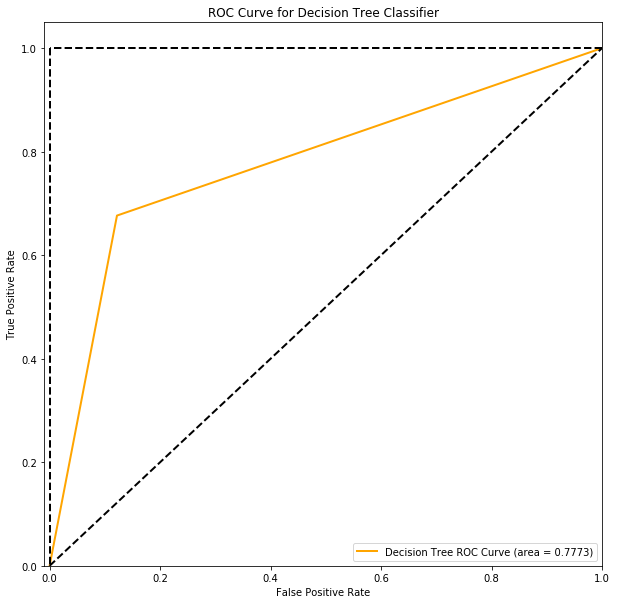

In [87]:
fig, ax = plt.subplots(figsize=(10, 10))

plt.plot(fpr1, tpr1,label='Decision Tree ROC Curve (area = %.4f)' % auc_dt, 
         color = 'orange', 
         linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.plot([0, 0], [1, 0], 'k--', lw=2, color = 'black')
plt.plot([1, 0], [1, 1], 'k--', lw=2, color = 'black')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree Classifier')
plt.legend(loc="lower right")

plt.show()

## Implementing Logistic Regression

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import statsmodels.api as sm

clf = LogisticRegression(penalty='l2', C=0.1)
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[::,1]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Evaluating the performance of Logistic Regression

In [92]:
from sklearn.metrics import confusion_matrix
cm_lr = confusion_matrix(Y_test,  y_pred, labels = [1,0])
print('Confusion Matrix : \n', cm_lr)
TP = cm_lr[0,0]
FN = cm_lr[0,1]
FP = cm_lr[1,0]
TN = cm_lr[1,1]
accuracy_lr=(TP + TN) / float(TP + TN + FP + FN)
print ('Accuracy : ', accuracy_lr)
sensitivity_lr = TP / float(FN + TP)
print('Sensitivity : ', sensitivity_lr )
specificity_lr = TN / float(TN + FP)
print('Specificity : ', specificity_lr)
ppv_lr = TP / float(FP + TP)
print('Positive Predictive Value: ', ppv_lr)
npv_lr = TN / float(TN + FN)
print('Negative Predictive Value: ', npv_lr)
false_positive_rate = FP / float(TN + FP)
print('False Positive Rate: ',false_positive_rate)
precision = TP / float(TP + FP)
print('Precision: ', precision)

Confusion Matrix : 
 [[24  4]
 [10 37]]
Accuracy :  0.8133333333333334
Sensitivity :  0.8571428571428571
Specificity :  0.7872340425531915
Positive Predictive Value:  0.7058823529411765
Negative Predictive Value:  0.9024390243902439
False Positive Rate:  0.2127659574468085
Precision:  0.7058823529411765


## Developing a ROC Curve for Logistic Regression and computing the AUC

In [93]:
fpr2, tpr2, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc_lr = metrics.roc_auc_score(Y_test, y_pred_proba)

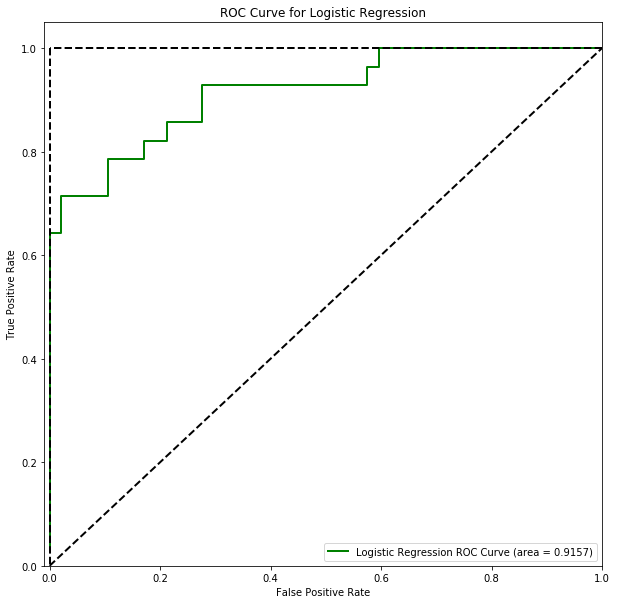

In [94]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.plot(fpr2, tpr2,label='Logistic Regression ROC Curve (area = %.4f)' % auc_lr, 
         color = 'green', 
         linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.plot([0, 0], [1, 0], 'k--', lw=2, color = 'black')
plt.plot([1, 0], [1, 1], 'k--', lw=2, color = 'black')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc="lower right")

plt.show()

## Implementing SVM

In [95]:
from sklearn import svm
from sklearn import metrics

svm_linear = svm.SVC(kernel='linear', C=10, probability = True)
svm_linear.fit(X_train, Y_train)
y_pred_svm = svm_linear.predict(X_test)
y_pred_proba_svm = svm_linear.predict_proba(X_test)[::,1]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Evaluating the Performance of SVM

In [96]:
from sklearn.metrics import confusion_matrix
cm_svm = confusion_matrix(Y_test,  y_pred_svm, labels = [1,0])
print('Confusion Matrix : \n', cm_svm)
TP = cm_svm[0,0]
FN = cm_svm[0,1]
FP = cm_svm[1,0]
TN = cm_svm[1,1]
accuracy_svm=(TP + TN) / float(TP + TN + FP + FN)
print ('Accuracy : ', accuracy_svm)
sensitivity_svm = TP / float(FN + TP)
print('Sensitivity : ', sensitivity_svm )
specificity_svm = TN / float(TN + FP)
print('Specificity : ', specificity_svm)
ppv_svm = TP / float(FP + TP)
print('Positive Predictive Value: ', ppv_svm)
npv_svm = TN / float(TN + FN)
print('Negative Predictive Value: ', npv_svm)
false_positive_rate = FP / float(TN + FP)
print('False Positive Rate: ',false_positive_rate)
precision = TP / float(TP + FP)
print('Precision: ', precision)

Confusion Matrix : 
 [[25  3]
 [ 7 40]]
Accuracy :  0.8666666666666667
Sensitivity :  0.8928571428571429
Specificity :  0.851063829787234
Positive Predictive Value:  0.78125
Negative Predictive Value:  0.9302325581395349
False Positive Rate:  0.14893617021276595
Precision:  0.78125


## Developing a ROC Curve for SVM and computing the AUC

In [97]:
fpr3, tpr3, _ = metrics.roc_curve(Y_test,  y_pred_proba_svm)
auc_sv = metrics.roc_auc_score(Y_test, y_pred_proba_svm)

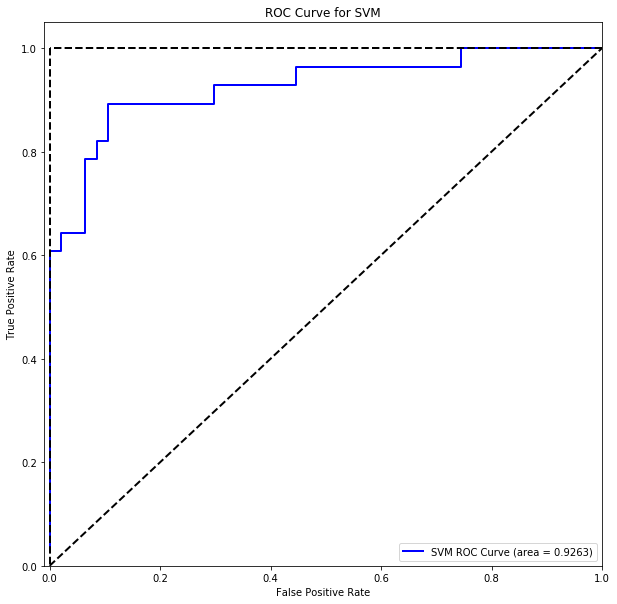

In [98]:
fig, ax = plt.subplots(figsize=(10, 10))

plt.plot(fpr3, tpr3,label='SVM ROC Curve (area = %.4f)' % auc_sv, 
         color = 'blue', 
         linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.plot([0, 0], [1, 0], 'k--', lw=2, color = 'black')
plt.plot([1, 0], [1, 1], 'k--', lw=2, color = 'black')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM')
plt.legend(loc="lower right")

plt.show()

# Comparison of ROC and AUC for Decision Tree Classifier, Logistic Regression and SVM

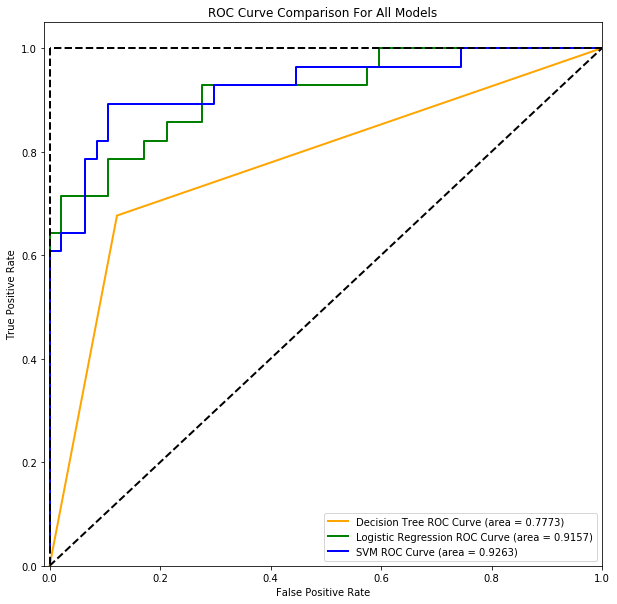

In [99]:
fig, ax = plt.subplots(figsize=(10, 10))

plt.plot(fpr1, tpr1,label='Decision Tree ROC Curve (area = %.4f)' % auc_dt, 
         color = 'orange', 
         linewidth=2)
plt.plot(fpr2, tpr2,label='Logistic Regression ROC Curve (area = %.4f)' % auc_lr, 
         color = 'green', 
         linewidth=2)
plt.plot(fpr3, tpr3,label='SVM ROC Curve (area = %.4f)' % auc_sv, 
         color = 'blue', 
         linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.plot([0, 0], [1, 0], 'k--', lw=2, color = 'black')
plt.plot([1, 0], [1, 1], 'k--', lw=2, color = 'black')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison For All Models')
plt.legend(loc="lower right")

plt.show()